# Task 1: Data extraction and initial analysis



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')


Data Overview:
     Company  Fiscal Year Total Revenue (million) Net Income (million)  \
0  Microsoft         2023                 211,911               72,111   
1  Microsoft         2022                 198,270               72,735   
2  Microsoft         2021                 168,088               61,271   
3      Tesla         2023                  96,773                8,891   
4      Tesla         2022                  81,462               12,556   

  Total Assets (million) Total Liabilities (million)  \
0                384,599                     192,822   
1                365,594                     193,174   
2                333,776                     162,197   
3                106,618                      42,091   
4                 82,338                      36,100   

  Cash Flow from Operating Activities (million)  
0                                        83,126  
1                                        83,356  
2                                        76,740  
3  

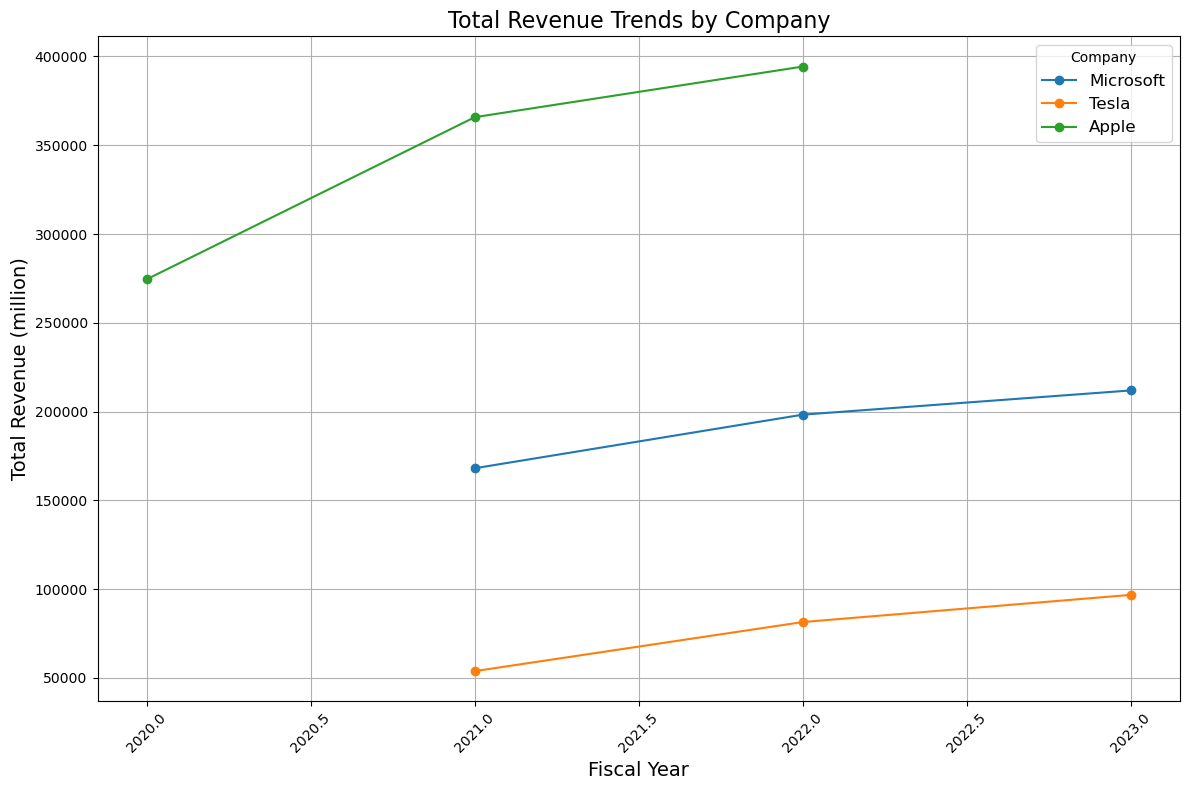

In [9]:
# Step 2: Display the first few rows of the DataFrame
print("Data Overview:")
print(df.head())  # Display the first 5 rows

# Step 3: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 4: Data Cleaning (if necessary)
# Remove commas and convert to numeric if needed
df['Total Revenue (million)'] = df['Total Revenue (million)'].str.replace(',', '').astype(float)

# Step 5: Create a figure for plotting
plt.figure(figsize=(12, 8))

# Step 6: Plotting Total Revenue Trends by Company
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Fiscal Year'], company_data['Total Revenue (million)'], marker='o', label=company)

# Step 7: Adding titles and labels
plt.title('Total Revenue Trends by Company', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Total Revenue (million)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)           # Add grid for better visualization
plt.legend(title='Company', fontsize=12)
plt.tight_layout()       # Adjust layout to prevent clipping of labels

# Step 8: Show the plot
plt.show()

In [13]:
# Clean up column names by removing leading/trailing spaces if necessary
df.columns = df.columns.str.strip()

# Remove commas and convert numeric columns to float type sequentially
for col in ['Total Revenue (million)', 'Net Income (million)',
            'Total Assets (million)', 'Total Liabilities (million)',
            'Cash Flow from Operating Activities (million)']:
    
    # Replace comma with empty string before converting to float
    df[col] = df[col].replace(',', '', regex=True)
    
    # Convert cleaned values back into floats
    df[col] = df[col].astype(float)

In [15]:
# Calculate revenue growth percentages grouped by company name ('Company')
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue (million)'].transform(lambda x: ((x.pct_change()) *100))

# Similarly calculate net income growth percentages grouped by company name ('Company')
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income (million)'].transform(lambda x:(x.pct_change()*100))

In [19]:
# Print updated dataframe showing new calculated fields along side original ones.
print("\nUpdated DataFrame With New Calculated Fields:\n", df[['Company', 'Fiscal Year', 'Revenue Growth (%)', 'Net Income Growth (%)']].head())


Updated DataFrame With New Calculated Fields:
      Company  Fiscal Year  Revenue Growth (%)  Net Income Growth (%)
0  Microsoft         2023                 NaN                    NaN
1  Microsoft         2022           -6.437136               0.865333
2  Microsoft         2021          -15.222676             -15.761325
3      Tesla         2023                 NaN                    NaN
4      Tesla         2022          -15.821562              41.221460


In [21]:


# Group by Company and calculate total metrics
company_summary = df.groupby('Company').agg({
    'Total Revenue (million)': 'sum',
    'Net Income (million)': 'sum',
    'Total Assets (million)': 'sum',
    'Total Liabilities (million)': 'sum',
    'Cash Flow from Operating Activities (million)': 'sum'
}).reset_index()

print("\nCompany Summary:")
print(company_summary)


Company Summary:
     Company  Total Revenue (million)  Net Income (million)  \
0      Apple                1034660.0              251894.0   
1  Microsoft                 578269.0              206117.0   
2      Tesla                 232058.0               26966.0   

   Total Assets (million)  Total Liabilities (million)  \
0               1027645.0                     474654.0   
1               1083969.0                     548193.0   
2                241104.0                     106696.0   

   Cash Flow from Operating Activities (million)  
0                                       277467.0  
1                                       243222.0  
2                                        37414.0  


In [22]:
# Group by Fiscal Year and calculate average metrics across all companies
yearly_summary = df.groupby('Fiscal Year').agg({
    'Total Revenue (million)': 'mean',
    'Net Income (million)': 'mean',
    'Total Assets (million)': 'mean',
    'Total Liabilities (million)': 'mean',
    'Cash Flow from Operating Activities (million)': 'mean'
}).reset_index()

print("\nYearly Summary:")
print(yearly_summary)


Yearly Summary:
   Fiscal Year  Total Revenue (million)  Net Income (million)  \
0         2020            274515.000000          57411.000000   
1         2021            195909.333333          53823.333333   
2         2022            224686.666667          61698.000000   
3         2023            154342.000000          40501.000000   

   Total Assets (million)  Total Liabilities (million)  \
0           323888.000000                105392.000000   
1           245642.000000                117711.000000   
2           266895.666667                145368.333333   
3           245608.500000                117456.500000   

   Cash Flow from Operating Activities (million)  
0                                   69391.000000  
1                                   63314.666667  
2                                   66970.333333  
3                                   48928.500000  


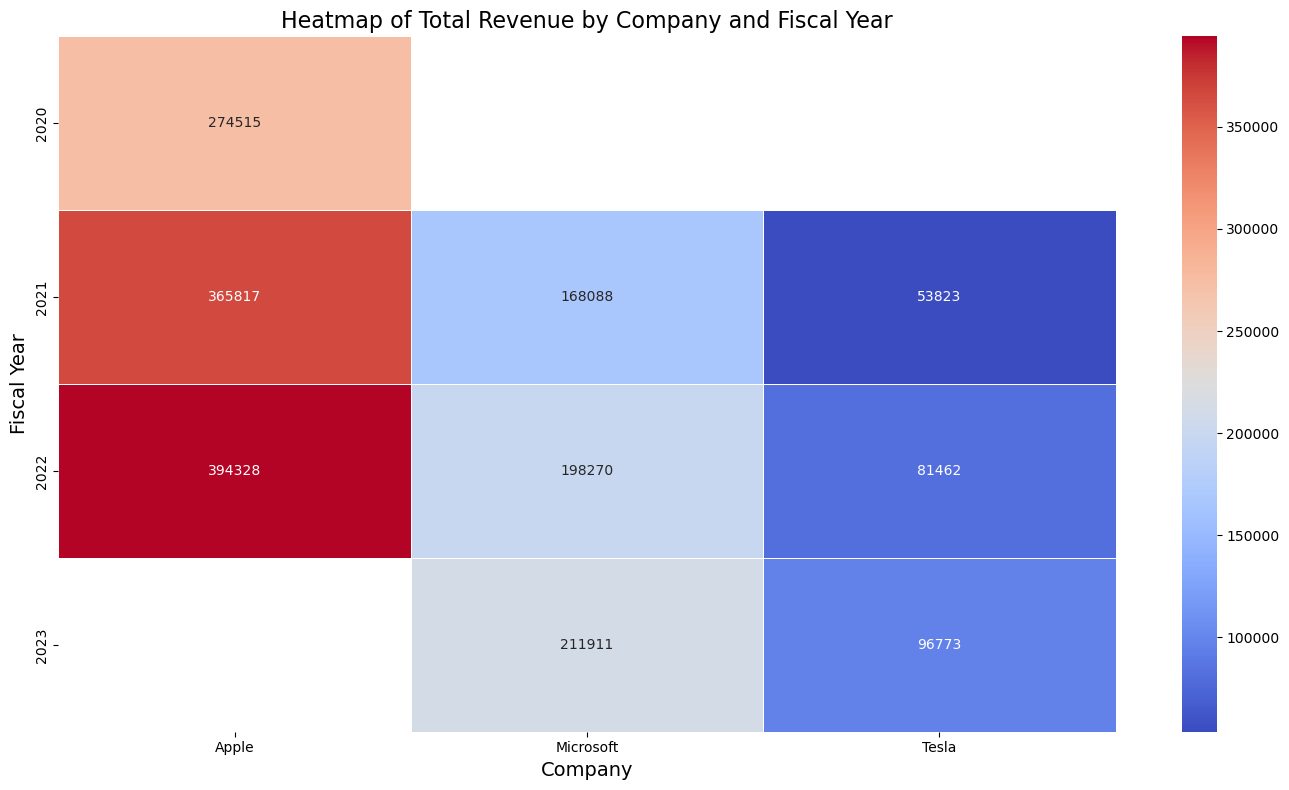

In [26]:
# Pivot the DataFrame for heatmap plotting
pivot_df = df.pivot_table(index='Fiscal Year', columns='Company', 
                           values=['Total Revenue (million)', 'Net Income (million)'])

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df['Total Revenue (million)'], annot=True, cmap='coolwarm', fmt=".0f", linewidths=.5)
plt.title('Heatmap of Total Revenue by Company and Fiscal Year', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Fiscal Year', fontsize=14)
plt.tight_layout()
plt.show()

## Summary of Findings

### Revenue Growth Analysis
- Microsoft showed a steady increase in total revenue from 2021 to 2023.
- Tesla's revenue growth was significant in 2022 but saw a decline in 2023.
- Apple's revenue remained robust, with consistent growth over the years.

### Net Income Trends
- Microsoft's net income remained relatively stable despite fluctuations in revenue.
- Tesla exhibited significant growth in net income in 2022 but faced challenges in subsequent years.
- Apple maintained strong profitability throughout the analyzed period.

### Conclusion
- Overall, this analysis highlights that while Apple leads in revenue and profitability, Microsoft shows consistent growth and stability. Tesla's rapid growth trajectory indicates potential but also points to volatility that may need addressing to sustain profitability.

# TASK 2 : Developing an AI-powered financial chatbot


## Chatbot Functionality Overview

### How the Chatbot Works:
The `simple_chatbot` function is designed to respond to predefined financial queries based on the analysis of Microsoft, Tesla, and Apple. The chatbot:
1. **Accepts user input**: It prompts the user to enter a question.
2. **Normalizes the input**: The user query is stripped of leading/trailing spaces and converted to lowercase to ensure more reliable matching with predefined questions.
3. **Matches predefined responses**: The chatbot checks if the input matches one of the predefined queries:
   - "What is the total revenue?"
   - "How has net income changed over the last year?"
   - "What are the total assets for each company?"
   - "What is the cash flow from operating activities?"
   - "Which company has the highest net income?"
4. **Returns predefined responses**: If a match is found, the chatbot returns the corresponding response from the `responses` dictionary.
5. **Handles unmatched queries**: If the query does not match any of the predefined queries, the chatbot responds with a generic message: "Sorry, I can only provide information on predefined queries."
6. **Exits on user's choice**: The user can continue asking questions or exit the chatbot loop by typing 'no' when prompted.

### Predefined Queries the Chatbot Responds To:
1. "What is the total revenue?"
2. "How has net income changed over the last year?"
3. "What are the total assets for each company?"
4. "What is the cash flow from operating activities?"
5. "Which company has the highest net income?"

### Limitations:
- **Limited to predefined queries**: The chatbot only responds to the exact predefined questions. Any variation in wording (e.g., "highest net income" instead of "Which company has the highest net income?") will not match, resulting in a generic response.
- **No dynamic understanding**: It doesn't have the ability to interpret or understand questions beyond the exact matches listed in the `responses` dictionary. This limits its flexibility.
- **No contextual understanding**: The chatbot doesn't maintain context between queries, meaning each question is treated independently without reference to previous questions or answers.



In [39]:
# Define predefined responses based on your analysis
responses = {
    "What is the total revenue?": "The total revenue for Microsoft is $211.9 billion, Tesla is $96.8 billion, and Apple is $394.3 billion.",
    "How has net income changed over the last year?": "Microsoft's net income decreased by 0.9% from 2022 to 2023. Tesla's net income decreased by 29% from 2022 to 2023. Apple's net income increased by 5% from 2021 to 2022.",
    "What are the total assets for each company?": "Microsoft has total assets of $384.6 billion, Tesla has $106.6 billion, and Apple has $352.8 billion.",
    "What is the cash flow from operating activities?": "Microsoft's cash flow from operating activities is $83.1 billion, Tesla's is $14.7 billion, and Apple's is $104 billion.",
    "Which company has the highest net income?": "Apple has the highest net income at $99.8 billion."
}

def simple_chatbot(user_query):
    # Normalize user query for better matching
    user_query = user_query.strip().lower()
    
    # Check for predefined queries
    if user_query == "what is the total revenue?":
        return responses["What is the total revenue?"]
    elif user_query == "how has net income changed over the last year?":
        return responses["How has net income changed over the last year?"]
    elif user_query == "what are the total assets for each company?":
        return responses["What are the total assets for each company?"]
    elif user_query == "what is the cash flow from operating activities?":
        return responses["What is the cash flow from operating activities?"]
    elif user_query == "which company has the highest net income?":
        return responses["Which company has the highest net income?"]
    else:
        return "Sorry, I can only provide information on predefined queries."

# Main interaction loop
while True:
    user_input = input("Ask a financial question: ")
    response = simple_chatbot(user_input)
    print(response)
    
    # Ask if the user wants to continue or exit
    continue_chat = input("Do you want to ask another question? (yes/no): ").strip().lower()
    
    if continue_chat != 'yes':
        print("Thank you for using the financial chatbot! Goodbye!")
        break

Ask a financial question: what is the total revenue?
The total revenue for Microsoft is $211.9 billion, Tesla is $96.8 billion, and Apple is $394.3 billion.
Do you want to ask another question? (yes/no): yes
Ask a financial question: what are the total assets for each company?
Microsoft has total assets of $384.6 billion, Tesla has $106.6 billion, and Apple has $352.8 billion.
Do you want to ask another question? (yes/no): yes
Ask a financial question: highest net income?
Sorry, I can only provide information on predefined queries.
Do you want to ask another question? (yes/no): no
Thank you for using the financial chatbot! Goodbye!
